In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

import seaborn as sns
from ionpy.analysis import ResultsLoader
from ese.experiment.experiment.ese_exp import CalibrationExperiment
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE/"

%load_ext yamlmagic
%load_ext autoreload
%autoreload 2

In [2]:
train_path = f"{root}/training/10_23_23_Dense_WMH"

dfc = rs.load_configs(
    train_path,
    properties=False,
)

  0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
# Set the device
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

best_exp = rs.get_best_experiment(
    df=rs.load_metrics(dfc),
    exp_class=CalibrationExperiment,
    device="cuda"
)

  0%|          | 0/2 [00:00<?, ?it/s]

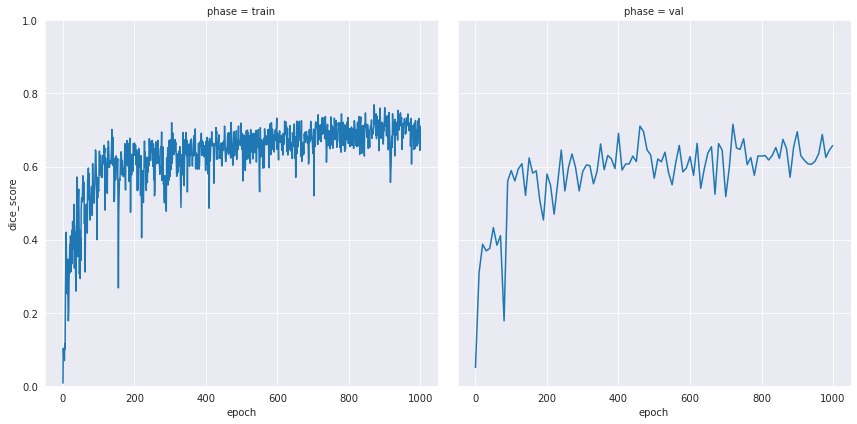

In [4]:
best_exp.vis_loss_curves(height=6)

In [5]:
from ese.experiment.analysis.inference import load_cal_inference_stats

inference_path = f"{root}/inference/11_11_23_WMH_Weighted_SUME"

cal_inference_info = load_cal_inference_stats(
    log_dir=inference_path,
)

In [6]:
cal_inference_info.keys()

dict_keys(['pixel_info_dicts', 'image_info_df', 'metadata'])

In [7]:
metadata = cal_inference_info['metadata']

In [8]:
# Get the pixel preds out
pixel_preds_dict = cal_inference_info["pixel_info_dicts"][metadata['log_set'].iloc[0]]

## Pixel-level Analysis

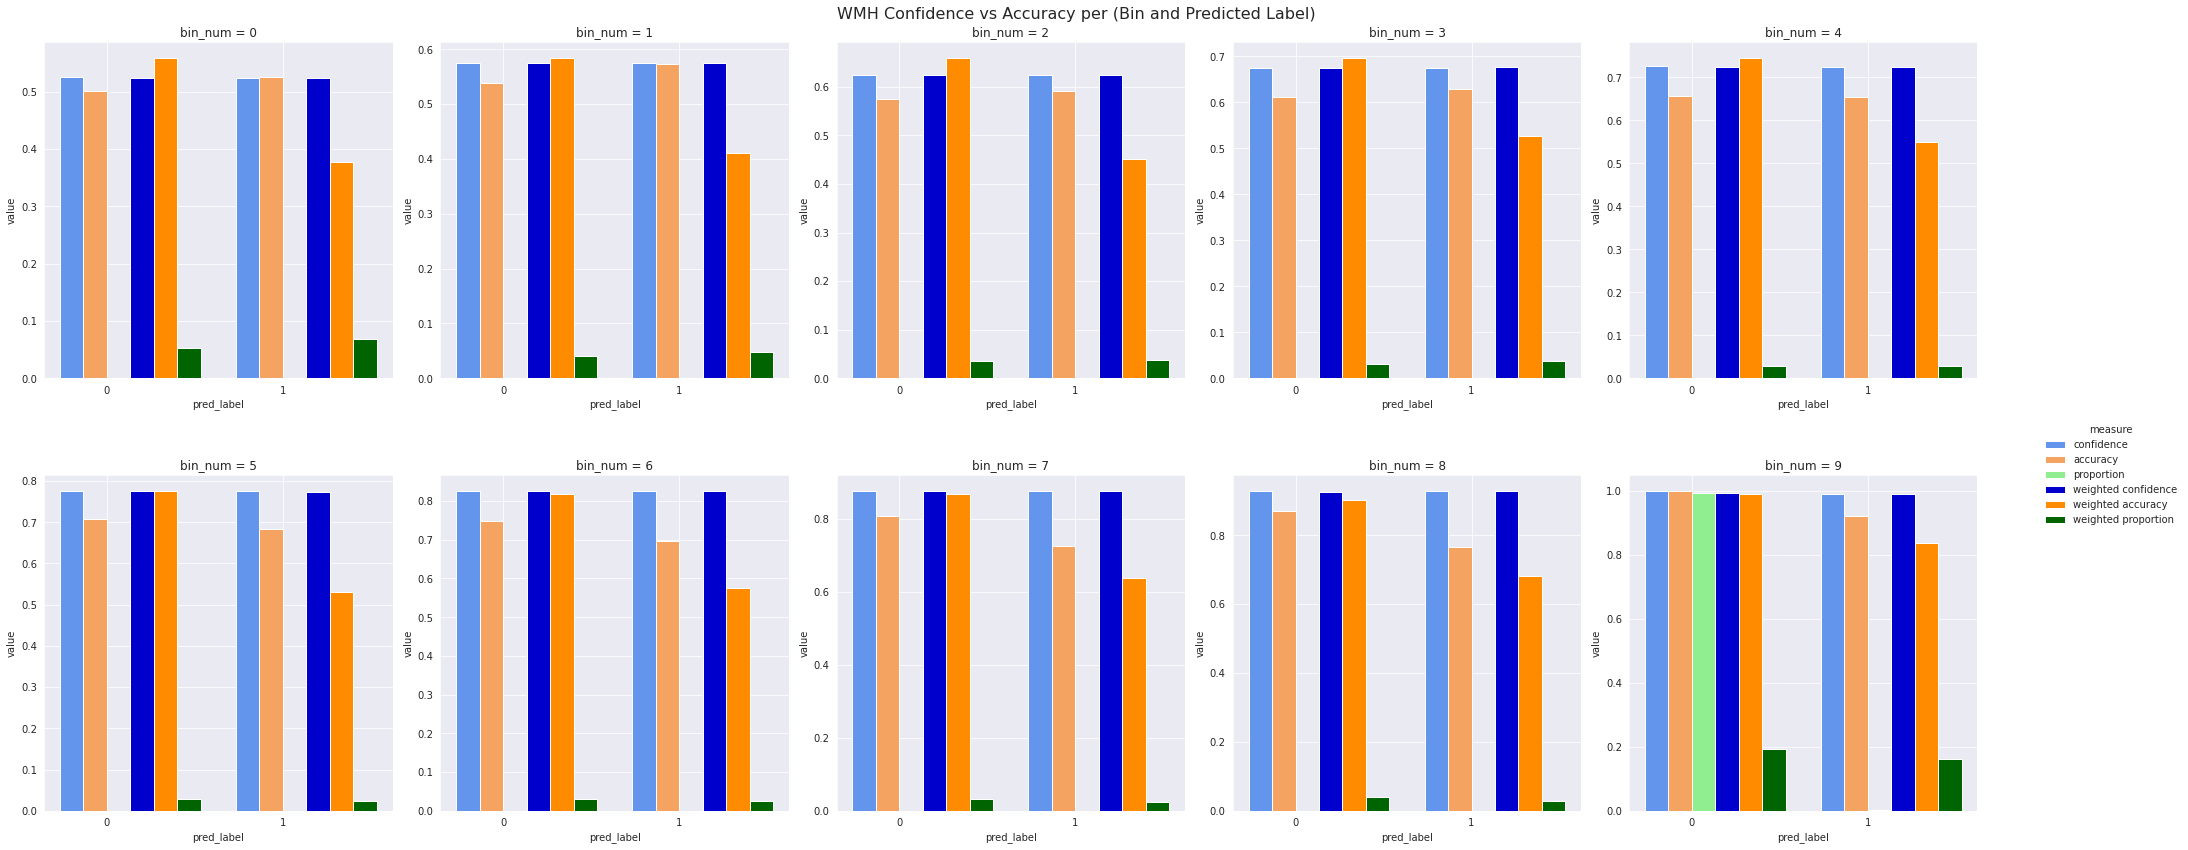

In [9]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Predicted Label)",
    x="pred_label",
    col="bin_num",
    kind="bar",
    add_avg=False,
    facet_kws={'sharey': False, 'sharex': False}
    )

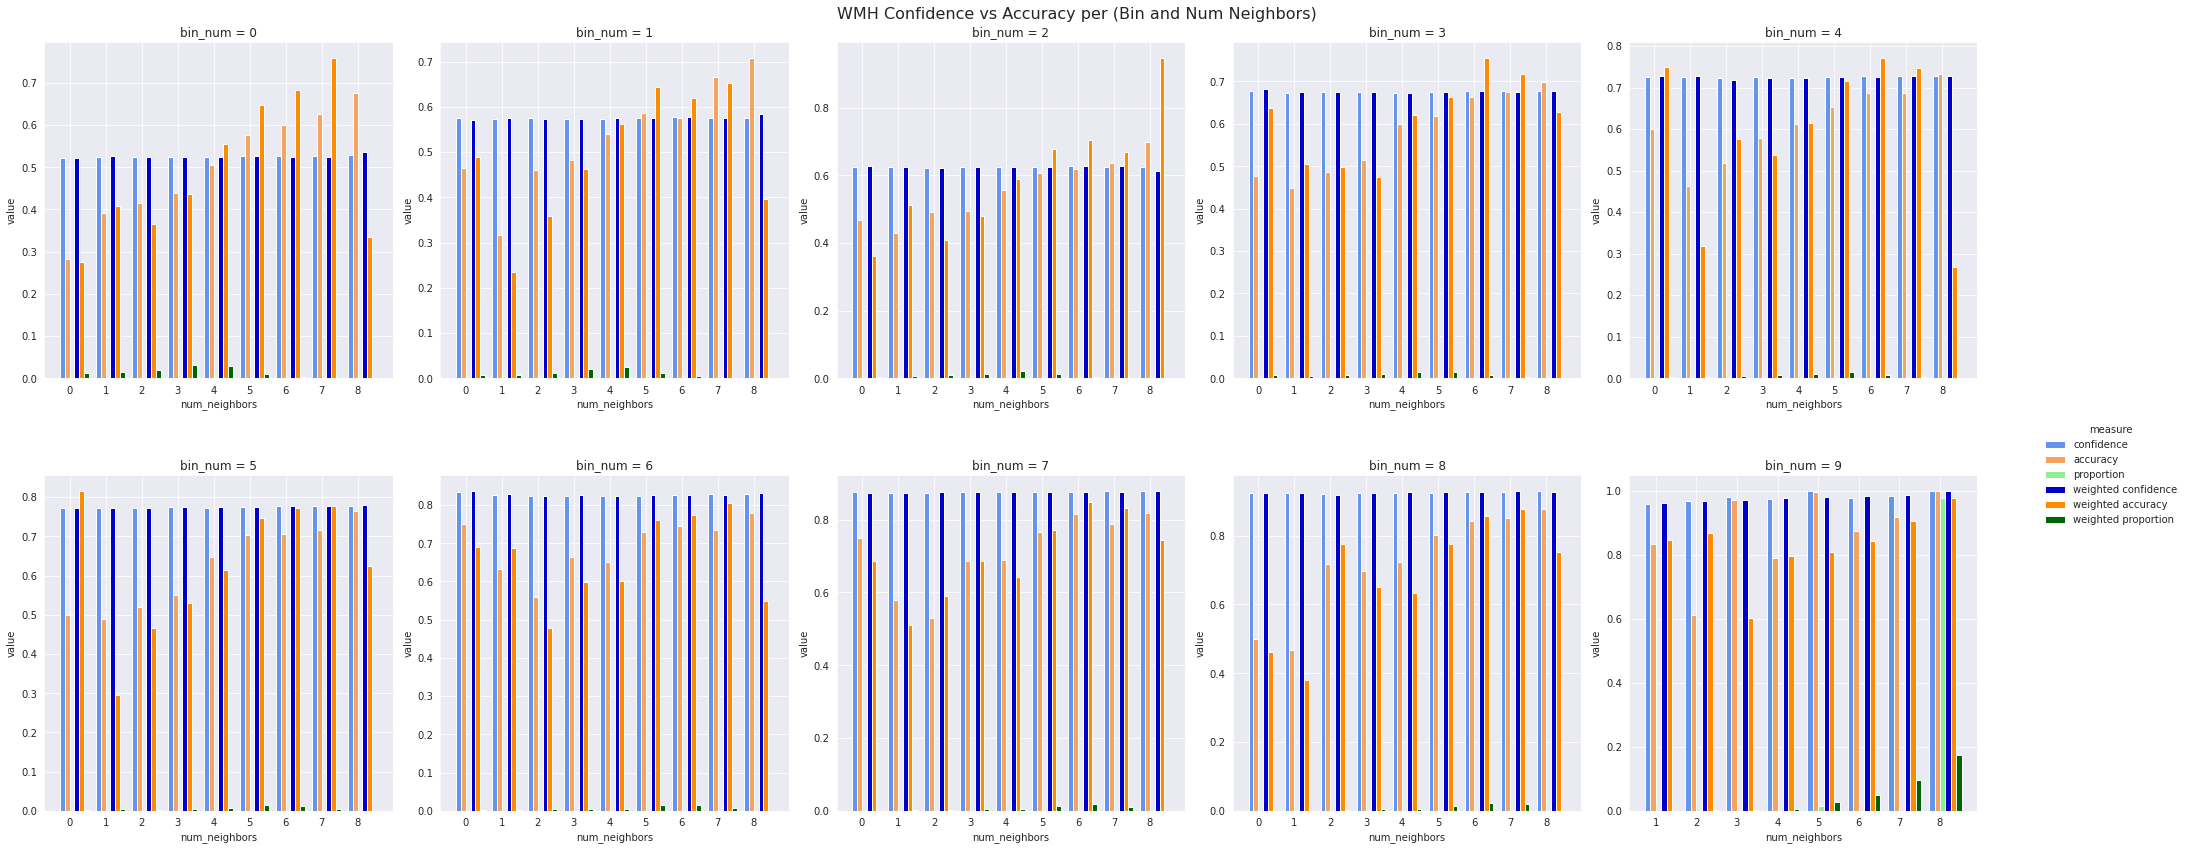

In [10]:
from ese.experiment.analysis.err_diagrams import viz_accuracy_vs_confidence

viz_accuracy_vs_confidence(
    pixel_preds_dict,
    title="WMH Confidence vs Accuracy per (Bin and Num Neighbors)",
    x="num_neighbors",
    col="bin_num",
    kind="bar",
    add_avg=False,
    add_proportion=True,
    facet_kws={'sharey': False, 'sharex': False},
    )

## Image-level Analysis

In [11]:
image_info_df = cal_inference_info['image_info_df']

In [12]:
image_info_df.head()

,bin_weighting,cal_metric,cal_score,qual_metric,qual_score,data_id,slice_idx,annotator,axis,num_slices,preload,slicing,task,version,split,_class,log_set
0,proportional,ECE,0.000039,accuracy,9.999390e-01,103,0,observer_o12,0,1,False,dense_full,Amsterdam,0.2,cal,ese.experiment.datasets.WMH,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
1,proportional,ECE,0.000039,dice,2.500000e-08,103,0,observer_o12,0,1,False,dense_full,Amsterdam,0.2,cal,ese.experiment.datasets.WMH,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
2,proportional,ECE,0.000039,w_accuracy,5.000000e-01,103,0,observer_o12,0,1,False,dense_full,Amsterdam,0.2,cal,ese.experiment.datasets.WMH,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
3,proportional,TL ECE,0.000039,accuracy,9.999390e-01,103,0,observer_o12,0,1,False,dense_full,Amsterdam,0.2,cal,ese.experiment.datasets.WMH,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
4,proportional,TL ECE,0.000039,dice,2.500000e-08,103,0,observer_o12,0,1,False,dense_full,Amsterdam,0.2,cal,ese.experiment.datasets.WMH,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...


In [13]:
image_info_df.keys()

Index(['bin_weighting', 'cal_metric', 'cal_score', 'qual_metric', 'qual_score',
       'data_id', 'slice_idx', 'annotator', 'axis', 'num_slices', 'preload',
       'slicing', 'task', 'version', 'split', '_class', 'log_set'],
      dtype='object')

In [14]:
from ese.experiment.analysis.utils import reorder_splits

unique_image_df = reorder_splits(image_info_df.drop_constant())

In [15]:
unique_image_df

,cal_metric,cal_score,qual_metric,qual_score,data_id,slice_idx,split,log_set
0,ECE,0.000080,accuracy,9.999695e-01,138,0,train,20231111_113938-0JUL-0371a107d83f942deec53f0df...
1,ECE,0.000080,dice,5.000000e-08,138,0,train,20231111_113938-0JUL-0371a107d83f942deec53f0df...
2,ECE,0.000080,w_accuracy,5.000000e-01,138,0,train,20231111_113938-0JUL-0371a107d83f942deec53f0df...
3,TL ECE,0.000080,accuracy,9.999695e-01,138,0,train,20231111_113938-0JUL-0371a107d83f942deec53f0df...
4,TL ECE,0.000080,dice,5.000000e-08,138,0,train,20231111_113938-0JUL-0371a107d83f942deec53f0df...
...,...,...,...,...,...,...,...,...
8815,TL SUME,181.297592,dice,6.666667e-01,101,64,cal,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
8816,TL SUME,181.297592,w_accuracy,8.999542e-01,101,64,cal,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
8817,CW SUME,182.215057,accuracy,9.998779e-01,101,64,cal,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...
8818,CW SUME,182.215057,dice,6.666667e-01,101,64,cal,20231111_113938-K97E-1e9e056bfa53e4b53e88b3a97...


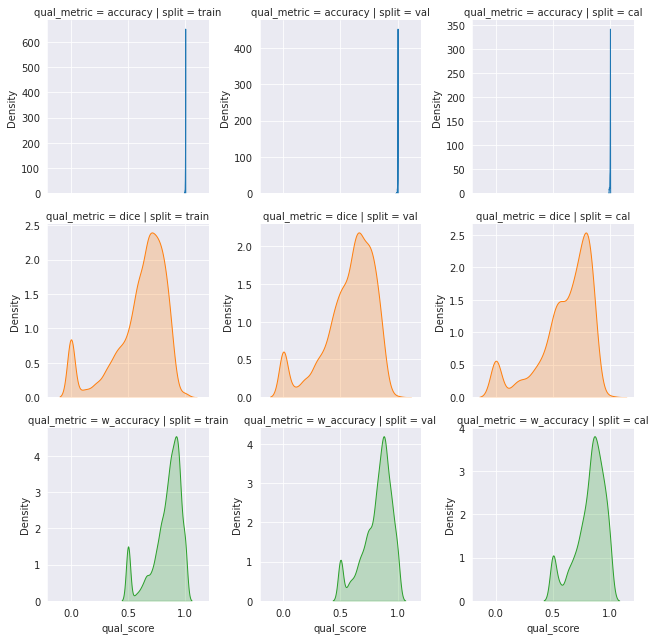

In [16]:
# Now using seaborn's FacetGrid to create the KDE plots for the 'accuracy' column for each 'split'.
g = sns.FacetGrid(unique_image_df, hue="qual_metric", col="split", row="qual_metric", sharex=True, sharey=False)
g = g.map(sns.kdeplot, "qual_score", fill=True)

# Adjusting the layout
g.fig.tight_layout()

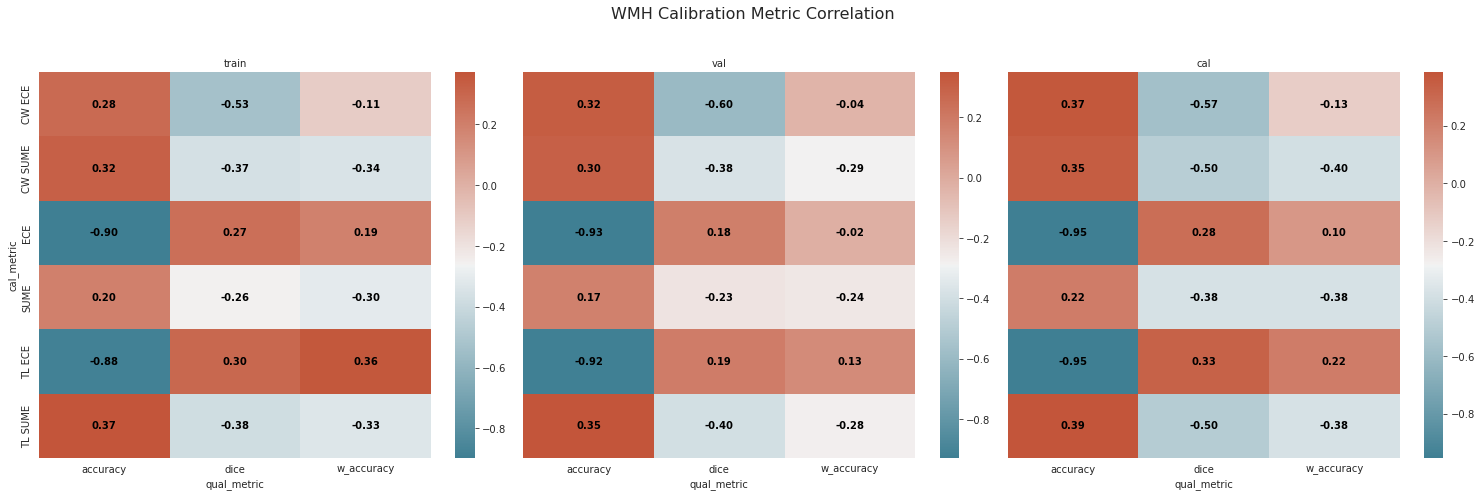

In [18]:
from ese.experiment.analysis.err_diagrams import viz_cal_metric_corr

viz_cal_metric_corr(
    unique_image_df,
    title="WMH Calibration Metric Correlation",
    height=7
    )